In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ex4_utils import *
import sympy as sp

In [2]:
N = 40
v = np.linspace(5 * math.pi, 0, N)
x = np.cos(v) * v
y = np.sin(v) * v

# Nearly Constant Velocity

In [39]:
T, q = sp.symbols("T, q")
F = sp.Matrix([[0,0,1,0],
               [0,0,0,1],
               [0,0,0,0],
               [0,0,0,0]])

AS = sp.exp(F*T)
LS = sp.Matrix([[0,0],
               [0,0],
               [1,0],
               [0,1]])
Q_iS = sp.integrate((AS*LS)*q*(AS*LS).T, (T, 0, T))

CS = sp.Matrix([[1, 0, 0, 0],
               [0, 1, 0, 0]])

r = sp.symbols("r")
R_iS = sp.Matrix([[r, 0],
                 [0, r]])

T_val = 0.5  # time step
q_val = 1  # process noise variance
r_val = 1.0  # measurement noise variance

In [40]:
sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
sx[0] = x[0]
sy[0] = y[0]
state = np.zeros((AS.shape[0], 1) ,dtype=np.float32).flatten()
state[0] = x[0]
state[1] = y[0]
covariance = np.eye(AS.shape[0], dtype=np.float32)
for j in range(1, x.size):
    T_val = 1  # time step
    q_val = 1.0  # process noise variance
    r_val = 5.0  # measurement noise variance
    A = np.array(AS.subs(T, T_val).evalf(), dtype=np.float32)
    Q_i = np.array(Q_iS.subs({T: T_val, q: q_val}).evalf(), dtype=np.float32)  # .evalf() evaluates the symbolic expression
    C = np.array(CS, dtype=np.float32)
    R_i = np.array(R_iS.subs(r, r_val).evalf(), dtype=np.float32)
    state , covariance , _ , _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),np.reshape(state, (-1, 1)), covariance)
    sx[j] = state[0]
    sy[j] = state[1]

C:\Users\matej\AppData\Local\Temp\ipykernel_31112\1721199308.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_31112\1721199308.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


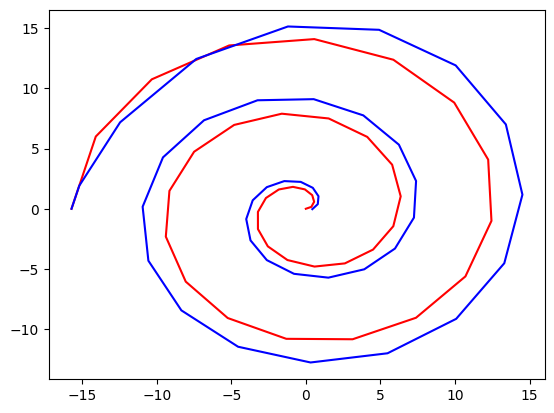

In [41]:
plt.plot(x, y, c="r")
plt.plot(sx, sy, c="b")

# Random walk

In [ ]:
T, q = sp.symbols("T, q")
F = sp.Matrix([[0,0,0,0],
               [0,0,0,0],
               [0,0,0,0],
               [0,0,0,0]])

AS = sp.exp(F*T)

LS = sp.Matrix([[1,0],
               [0,1],
               [0,0],
               [0,0]])

Q_iS = sp.integrate((AS*LS)*q*(AS*LS).T, (T, 0, T))

CS = sp.Matrix([[1, 0, 0, 0],
               [0, 1, 0, 0]])

r = sp.symbols("r")
R_iS = sp.Matrix([[r, 0],
                 [0, r]])

C:\Users\matej\AppData\Local\Temp\ipykernel_31112\3076602664.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_31112\3076602664.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


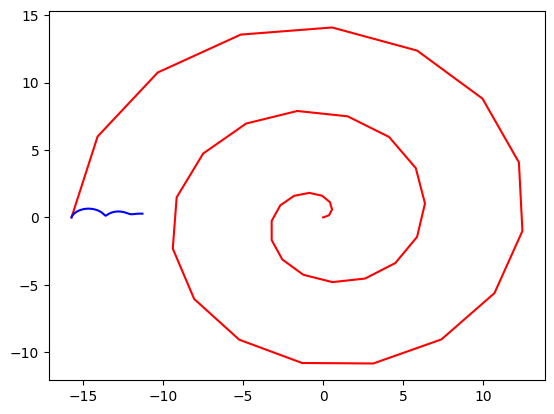

In [21]:
sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
sx[0] = x[0]
sy[0] = y[0]
state = np.zeros((AS.shape[0], 1) ,dtype=np.float32).flatten()
state[0] = x[0]
state[1] = y[0]
covariance = np.eye(AS.shape[0], dtype=np.float32)
for j in range(1, x.size):
    T_val = 1  # time step
    q_val = 1.0  # process noise variance
    r_val = 100.0  # measurement noise variance
    A = np.array(AS.subs(T, T_val).evalf(), dtype=np.float32)
    Q_i = np.array(Q_iS.subs({T: T_val, q: q_val}).evalf(), dtype=np.float32)  # .evalf() evaluates the symbolic expression
    C = np.array(CS, dtype=np.float32)
    R_i = np.array(R_iS.subs(r, r_val).evalf(), dtype=np.float32)
    state , covariance , _ , _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),np.reshape(state, (-1, 1)), covariance)
    sx[j] = state[0]
    sy[j] = state[1]

plt.plot(x, y, c="r")
plt.plot(sx, sy, c="b")

# Nearly constant acceleration

In [42]:
T, q = sp.symbols("T, q")
F = sp.Matrix([
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

AS = sp.exp(F*T)

LS = sp.Matrix([
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [1, 0],
    [0, 1]
])

Q_iS = sp.integrate((AS*LS)*q*(AS*LS).T, (T, 0, T))

CS = sp.Matrix([
    [1, 0, 0, 0, 0, 0],  # observe x
    [0, 1, 0, 0, 0, 0]   # observe y
])

r = sp.symbols("r")
R_iS = sp.Matrix([[r, 0],
                 [0, r]])

C:\Users\matej\AppData\Local\Temp\ipykernel_31112\179624059.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
C:\Users\matej\AppData\Local\Temp\ipykernel_31112\179624059.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


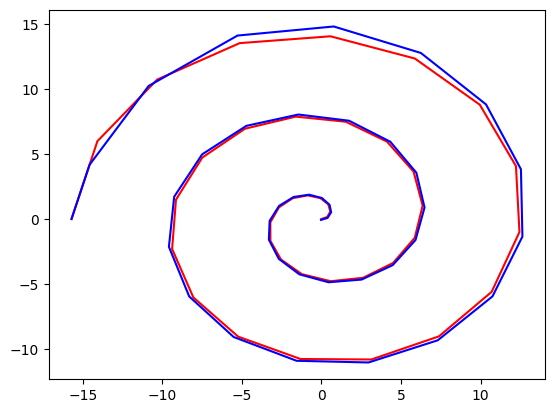

In [45]:
sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
sx[0] = x[0]
sy[0] = y[0]
state = np.zeros((AS.shape[0], 1) ,dtype=np.float32).flatten()
state[0] = x[0]
state[1] = y[0]
covariance = np.eye(AS.shape[0], dtype=np.float32)
for j in range(1, x.size):
    T_val = 1  # time step
    q_val = 1.0  # process noise variance
    r_val = 1.0  # measurement noise variance
    A = np.array(AS.subs(T, T_val).evalf(), dtype=np.float32)
    Q_i = np.array(Q_iS.subs({T: T_val, q: q_val}).evalf(), dtype=np.float32)  # .evalf() evaluates the symbolic expression
    C = np.array(CS, dtype=np.float32)
    R_i = np.array(R_iS.subs(r, r_val).evalf(), dtype=np.float32)
    state , covariance , _ , _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)),np.reshape(state, (-1, 1)), covariance)
    sx[j] = state[0]
    sy[j] = state[1]

plt.plot(x, y, c="r")
plt.plot(sx, sy, c="b")